# Problem set 2: Schwarzschild geodesics

In [62]:
import IPython
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

**Hint:** This is how you define a function:

In [64]:
def V_eff (r, l, k):
    return (1/2)*(1-2/r)*(k+l**2/r**2)
def D_V_eff (r, l, k):
    return 1/r**2 - l**2/r**3 + 3*l**2/r**4


**Hint:** This is how you can plot a function:

In [4]:
#matplotlib notebook

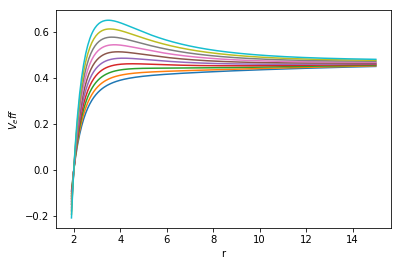

In [65]:
# Generate 100 numbers between 0 and 10 for the x-axis of the plot
r_space = np.linspace(start=1.9, stop=15, num=300)
# Make a list of a few values of `a` to plot
l_list = np.linspace(start=3, stop=5, num=10)

for l in l_list:
    plt.plot(r_space, V_eff (r_space, l, k=1) )

# Limit the axes to these ranges
#plt.ylim(0, 1)
#plt.xlim(-10, 10)
# Add axis labels
plt.xlabel(r'r')
plt.ylabel(r'$V_eff$');

In [4]:
def r_orbit(l, sign):
    
    return (l**2/2 + sign * np.sqrt(l**4/4 - 3*l**2 )) 


**Hint**: This is how you can integrate a coupled system of ODEs $\dot{\vec{x}}(\tau,\vec{x})$, where $\vec{x}$ is a collection of variables like $\vec{x}=(r,s,\ldots)$.

In [66]:
r_orbit(4, -1)

4.0

In [120]:
def r_dot(E, r, l, k, sign):
    return (sign * np.sqrt(E**2 - 2*V_eff(r, l, k)))

def t_dot(E,  r):
    return (E / (1 - 2/r))


def phi_dot(l, r):
    return l/r**2


def r_doubdot(l, r, k):
    return -D_V_eff(r, l, k)



def integrate_geodesics(r0, l, E, k, sign, step):   
    # Set up lists to store the values of the integration variable `tau`
    # and the integrated values `x(tau)=[r(tau), s(tau)]`.
    # Initially, they contain only the initial values `tau_0` and `[r_0, s_0]`.
    x_history = [[0,r0,0,r_dot(E=E, r=r0, l=l, k=k, sign=sign)]]
    tau_history = [0]
    # Set up the integration. The `lambda` function returns `x_dot` as a list `[r_dot, s_dot, ...]`.
    x = ode(lambda tau, x: [
       t_dot(E, x[1]),
       x[3],
       phi_dot(l, x[1]),
       r_doubdot(l, x[1], k) 
    ]).set_integrator('zvode', method='bdf').set_initial_value(x_history[0], tau_history[0])

    # Integrate while these conditions are met. We stop when `r` exceeds `3 * r0`
    # or when `s` exceeds `10`.
    while x.successful() and x_history[-1][1] < 3 * r0 and x_history[-1][2] < 10*np.pi and x_history[-1][1] > 0:
        x_history.append(x.integrate(x.t + step))
        tau_history.append(x.t)
    # Return the history as Numpy arrays, instead of simple lists, so that we can do slicing
    return np.asarray(tau_history), np.asarray(x_history)

In [158]:
#Perform the integration

L  = np.sqrt(12.1)
r0 = r_orbit(L, 1)
E0 = np.sqrt(2*V_eff(r=r0, l=L, k=1) + 0.0001)


In [159]:
2*V_eff(r=r0, l=L, k=1)

0.8905723905723905

In [160]:
(np.sqrt(E0**2 - 2*V_eff(r=r0, l=L, k=1)))


0.009999999999993897

In [161]:
E0**2


0.8906723905723903

In [162]:
tau, x = integrate_geodesics(r0=r0, l=L, E=E0, k=1, sign=1, step=0.02)

In [163]:
x


array([[ 0.00000000e+00+0.j,  6.60000000e+00+0.j,  0.00000000e+00+0.j,
         1.00000000e-02+0.j],
       [ 2.70814699e-02+0.j,  6.60020000e+00+0.j,  1.59706153e-03+0.j,
         9.99999884e-03+0.j],
       [ 5.41625831e-02+0.j,  6.60040000e+00+0.j,  3.19402628e-03+0.j,
         9.99999536e-03+0.j],
       ...,
       [ 5.37749175e+02+0.j,  6.57490413e+00+0.j,  3.14142746e+01+0.j,
        -9.98123051e-03+0.j],
       [ 5.37776302e+02+0.j,  6.57470451e+00+0.j,  3.14158840e+01+0.j,
        -9.98094056e-03+0.j],
       [ 5.37803429e+02+0.j,  6.57450489e+00+0.j,  3.14174935e+01+0.j,
        -9.98064833e-03+0.j]])

**Hint**: If the it takes too long, you can stop a running simulation by selecting `Kernel > Interrupt Kernel` in the menu bar above, or typing `Esc, I, I`. Adjust the integration step to make sure the simulation finishes in a reasonable time.

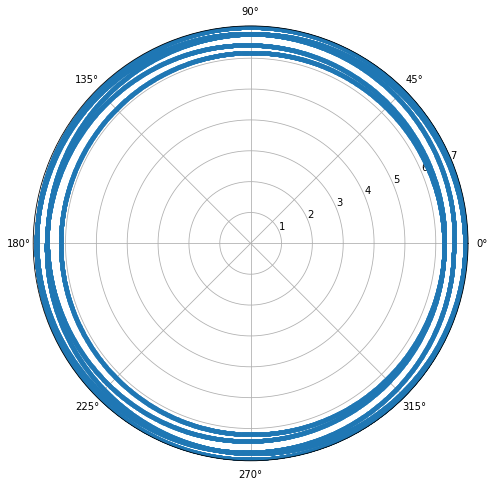

In [164]:
# Plot the results. You can retrieve the history of a particular
# variable by "slicing" the array `x`. For example, `x[:,0]`
# selects all rows of the array, but only the first value of each
# row. This corresponds to all values of the variable `r`.
# We make a polar plot here by treating `s` as an angle (in radians) and
# `r` as the radius corresponding to that angle.
plt.figure(figsize=(8, 8))
plt.polar(x[:,2], x[:,1], marker='.', ls='dotted');